In [39]:
## Image Classification Using Convolutional Neural Network with Keras and TensorFlow 

In [ ]:
from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

In [41]:
import os
import cv2

In [42]:
#PATH = '/home/JPV/image_database'
# Define data path
PATH=os.getcwd()
data_path = PATH + '/data'
#print("Data path is", data_path)
data_dir_list = os.listdir(data_path)

img_rows=128
img_cols=128
num_channel=1
num_epoch=20

# Define the number of classes
num_classes = 4

In [43]:
img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

Loaded the images of dataset-dogs

Loaded the images of dataset-Humans

Loaded the images of dataset-cats

Loaded the images of dataset-horses



In [44]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(808, 128, 128)


In [45]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)

else:
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)

(808, 1, 128, 128)


In [46]:
num_classes = 4

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:202]=0
labels[202:404]=1
labels[404:606]=2
labels[606:]=3 
names = ['cats','dogs','horses','humans']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [47]:
# Defining the model
input_shape=img_data[0].shape

model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

/home/jpv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 128, 1..., padding="same")`
  
/home/jpv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/home/jpv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]


In [48]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])


In [49]:
# Summary of all models
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 128, 128)      320       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 128, 128)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 126, 126)      9248      
_________________________________________________________________
activation_12 (Activation)   (None, 32, 126, 126)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 63, 63)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 63, 63)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 61, 61)        18496     
__________

True

In [50]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

/home/jpv/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 646 samples, validate on 162 samples
Epoch 1/20
646/646 [==============================] - 144s 222ms/step - loss: 1.6511 - acc: 0.2477 - val_loss: 1.3865 - val_acc: 0.2037
Epoch 2/20
646/646 [==============================] - 169s 262ms/step - loss: 1.3810 - acc: 0.2988 - val_loss: 1.3496 - val_acc: 0.2531
Epoch 3/20
646/646 [==============================] - 163s 252ms/step - loss: 1.3119 - acc: 0.4319 - val_loss: 1.2930 - val_acc: 0.5741
Epoch 4/20
646/646 [==============================] - 161s 250ms/step - loss: 1.2146 - acc: 0.4768 - val_loss: 1.2184 - val_acc: 0.5494
Epoch 5/20
646/646 [==============================] - 146s 227ms/step - loss: 1.0722 - acc: 0.5511 - val_loss: 1.1071 - val_acc: 0.5679
Epoch 6/20
646/646 [==============================] - 147s 228ms/step - loss: 0.9581 - acc: 0.6146 - val_loss: 0.9973 - val_acc: 0.5741
Epoch 7/20
646/646 [==============================] - 163s 252ms/step - loss: 0.8301 - acc: 0.6440 - val_loss: 1.0313 - val_acc: 0.5000
Ep

In [25]:
# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)


/home/jpv/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 646 samples, validate on 162 samples
Epoch 1/20
646/646 [==============================] - 129s 200ms/step - loss: 1.4286 - acc: 0.2910 - val_loss: 1.3642 - val_acc: 0.4136

Epoch 00001: val_loss improved from inf to 1.36422, saving model to Best-weights-my_model-001-1.4286-0.2910.hdf5
Epoch 2/20
646/646 [==============================] - 128s 199ms/step - loss: 1.2523 - acc: 0.4768 - val_loss: 1.2108 - val_acc: 0.5185

Epoch 00002: val_loss improved from 1.36422 to 1.21077, saving model to Best-weights-my_model-002-1.2523-0.4768.hdf5
Epoch 3/20
646/646 [==============================] - 128s 199ms/step - loss: 1.1111 - acc: 0.5263 - val_loss: 1.0131 - val_acc: 0.5432

Epoch 00003: val_loss improved from 1.21077 to 1.01313, saving model to Best-weights-my_model-003-1.1111-0.5263.hdf5
Epoch 4/20
646/646 [==============================] - 128s 199ms/step - loss: 1.0015 - acc: 0.5898 - val_loss: 1.1499 - val_acc: 0.4444

Epoch 00004: val_loss did not improve


In [51]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

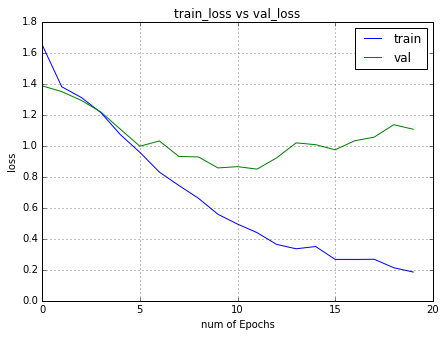

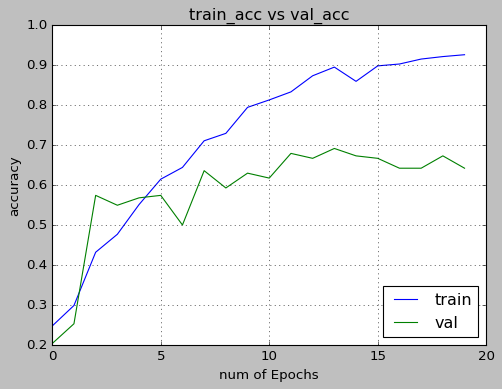

In [52]:

#Plotting Training Results

%matplotlib inline
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [53]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])


Test Loss: 1.1066904951
Test accuracy: 0.641975308642
(1, 1, 128, 128)
[[  7.22e-04   6.74e-07   9.99e-01   5.39e-06]]
[2]
[[ 0.  0.  1.  0.]]


In [54]:
# Testing a new image
test_image = cv2.imread('data/Humans/rider-8.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
    if K.image_dim_ordering()=='th':
        test_image= np.expand_dims(test_image, axis=0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=3) 
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)

else:
    if K.image_dim_ordering()=='th':
        test_image=np.rollaxis(test_image,2,0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)

# Predicting the test image
print((model.predict(test_image)))
print(model.predict_classes(test_image))

(128, 128)
(1, 1, 128, 128)
[[ 0.19  0.76  0.06  0.  ]]
[1]


(1, 1, 32, 126, 126)
(32, 126, 126)
(126, 126, 32)


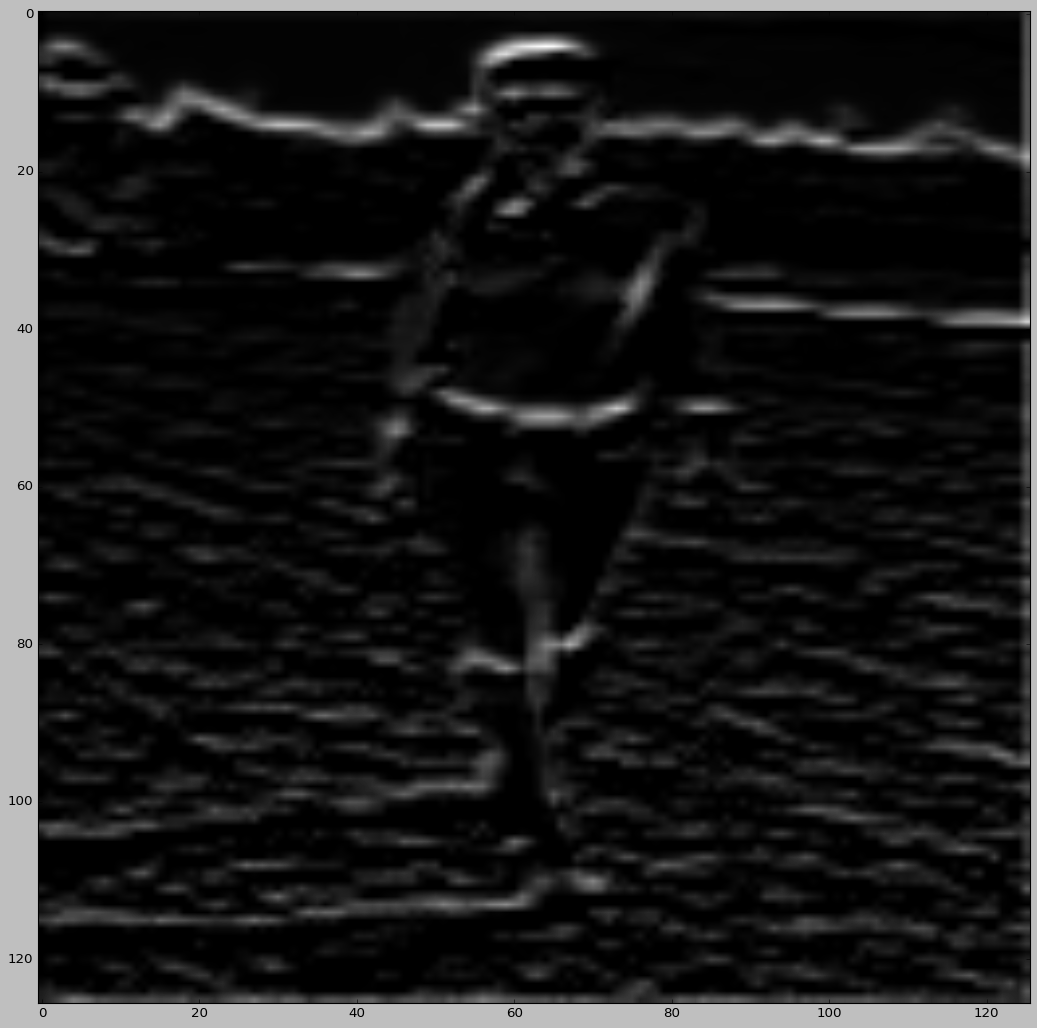

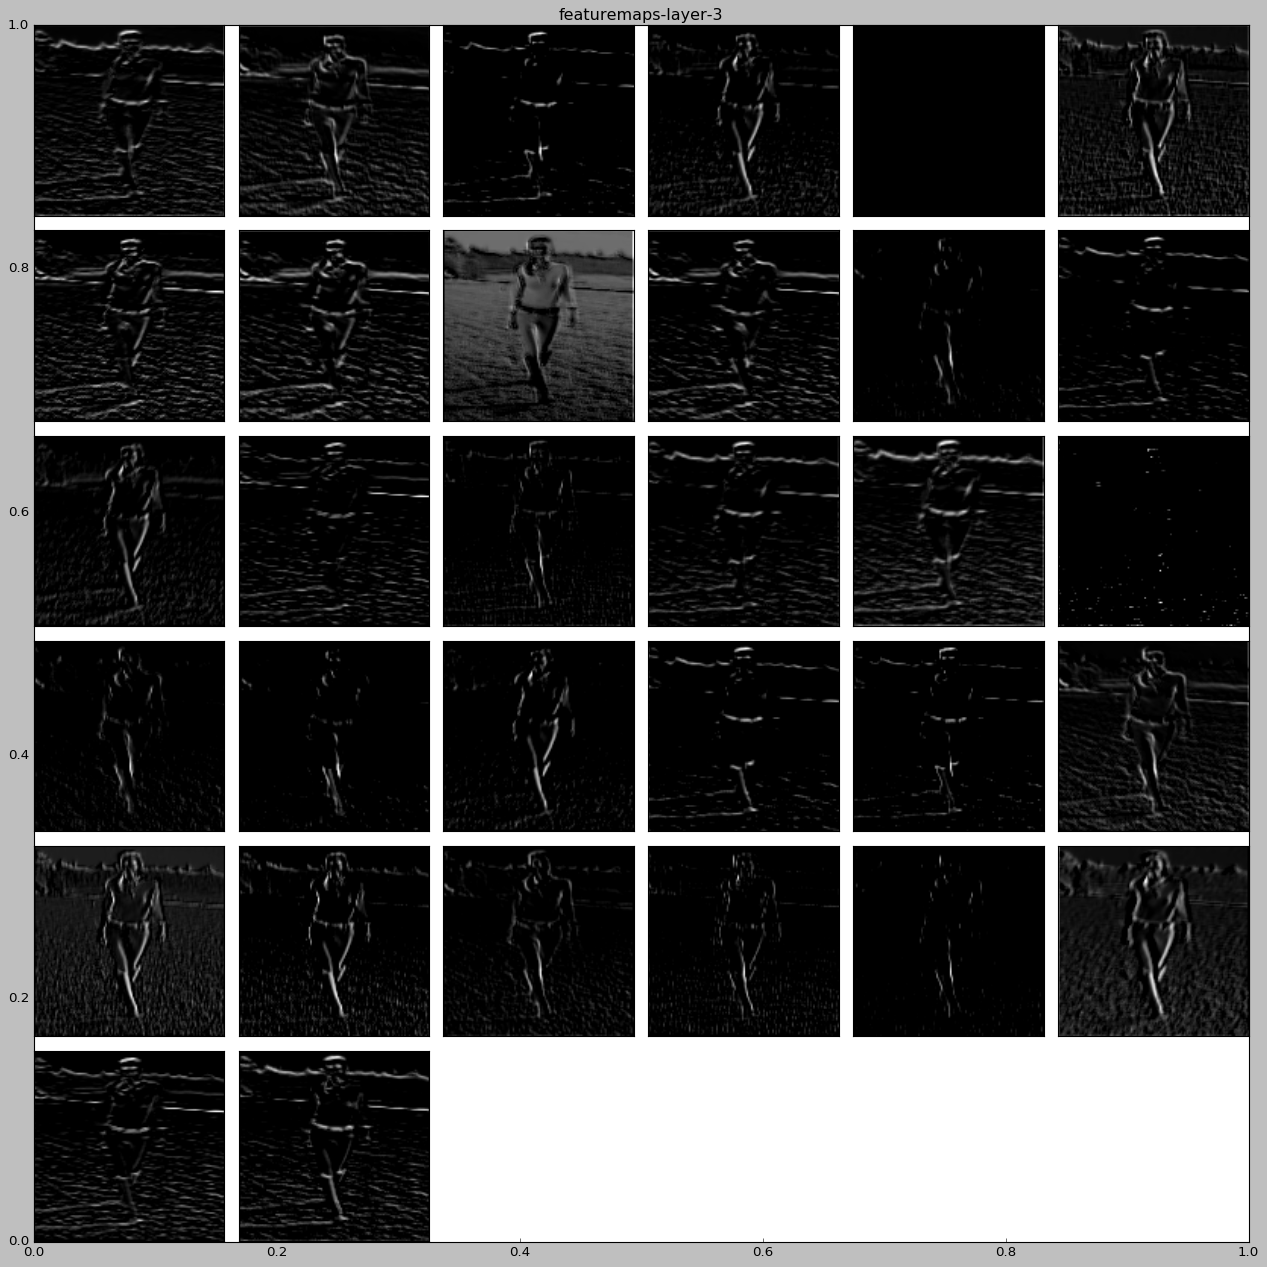

In [55]:
# Visualizing the intermediate layer

def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
    feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')


[[  7.22e-04   6.74e-07   9.99e-01   5.39e-06]
 [  1.85e-01   3.65e-02   7.15e-01   6.31e-02]
 [  9.34e-01   3.17e-04   2.43e-03   6.35e-02]
 [  5.14e-01   4.74e-02   3.33e-01   1.06e-01]
 [  8.01e-01   1.45e-02   1.32e-01   5.29e-02]
 [  1.28e-01   6.46e-03   7.03e-01   1.62e-01]
 [  2.59e-01   3.72e-03   1.30e-01   6.07e-01]
 [  2.76e-01   1.27e-01   2.40e-02   5.72e-01]
 [  4.66e-03   4.60e-02   8.91e-08   9.49e-01]
 [  1.60e-01   3.11e-03   5.98e-02   7.77e-01]
 [  1.72e-01   7.37e-03   6.31e-01   1.90e-01]
 [  2.17e-01   6.34e-02   1.45e-01   5.75e-01]
 [  1.83e-01   1.07e-02   4.39e-01   3.68e-01]
 [  5.61e-03   1.80e-04   7.26e-01   2.68e-01]
 [  8.14e-02   2.25e-02   4.27e-03   8.92e-01]
 [  7.42e-01   8.38e-03   2.22e-01   2.69e-02]
 [  8.35e-01   1.41e-05   1.65e-01   1.52e-05]
 [  1.90e-01   3.49e-01   1.81e-04   4.61e-01]
 [  1.90e-01   1.09e-02   5.66e-01   2.33e-01]
 [  1.54e-01   9.59e-05   8.40e-01   5.83e-03]
 [  2.11e-06   1.00e+00   7.39e-06   3.12e-09]
 [  3.44e-01 

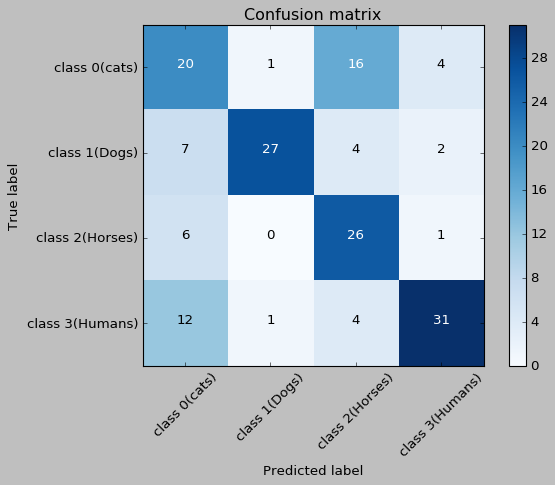

In [56]:

from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(cats)', 'class 1(Dogs)', 'class 2(Horses)','class 3(Humans)']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()


In [57]:
# Just for Information... 

# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

Saved model to disk
Loaded model from disk
